# <center><font color='#B4161B'> Air Pressure Failure System in Scania Trucks Prediction <center> 

## 1) Problem Statement:
 The dataset consists of data collected from heavy Scania 
     trucks in everyday usage. The system in focus is the 
     Air Pressure system (APS) which generates pressurised 
     air that are utilized in various functions in a truck, 
     such as braking and gear changes. The datasets' 
     positive class consists of component failures 
     for a specific component of the APS system. 
     The negative class consists of trucks with failures 
     for components not related to the APS. The data consists 
     of a subset of all available data, selected by experts. 

   -- Challenge metric  

     Cost-metric of miss-classification:

     Predicted class |      True class       |
                     |    pos    |    neg    |
     -----------------------------------------
      pos            |     -     |  Cost_1   |
     -----------------------------------------
      neg            |  Cost_2   |     -     |
     -----------------------------------------
     Cost_1 = 10 and cost_2 = 500

     The total cost of a prediction model the sum of "Cost_1" 
     multiplied by the number of Instances with type 1 failure 
     and "Cost_2" with the number of instances with type 2 failure, 
     resulting in a "Total_cost".

     In this case Cost_1 refers to the cost that an unnessecary 
     check needs to be done by an mechanic at an workshop, while 
     Cost_2 refer to the cost of missing a faulty truck, 
     which may cause a breakdown.

     Total_cost = Cost_1*No_Instances + Cost_2*No_Instances

- <font color='#6A1B4D'>From the above problem statement we could observe that, we have to reduce false positives and false negatives.<b> More importantly we have to reduce false negatives, since cost incurred due to false negative is 50 times higher than the false positives.<b>

    

## 2) Dataset Overview:

- The training dataset consists of 60,000 data points and 171 features, of which one is the class label.
- The Dataset is collected from Website- UCI Machine Learning Repository
- You can access data by link- https://archive.ics.uci.edu/ml/machine-learning-databases/00421/

### Imort Required libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix
import xgboost

from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer


warnings.filterwarnings("ignore")
%matplotlib inline

### Read csv data as pandas DataFrame

In [3]:
df=pd.read_csv(r"aps_failure_training_set.csv", header=14)

In [4]:
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


### Checking rows and columns of the dataset

In [5]:
df.shape

(60000, 171)

 * No. of rows- 60000
 * No. of columns- 171

### Checking Feature names of the dataset

In [6]:
df.columns

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

 There is one target column present name "class"

#### Checking unique values present in target column

In [7]:
df['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

#### observation: 
    Data is highly imbalance on the bases of target columns as negative values are approx 60 times more than positive values in target column. 

### checking datatype of all columns

In [8]:
df.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

In [9]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))



We have 1 numerical features : ['aa_000']

We have 170 categorical features : ['class', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_

#### Observation: <font color="#B4161B"> There is only one columns of data type integer and all other columns are of object type. Need to change data type of 169 columns<font>

### Cleaning Data

#### Replacing all 'na' values with null i.e with 'nan'

In [10]:
df=df.replace('na',np.nan)

#### Converting all datatypes all columns to float exluding class column

In [11]:
for feature in df.columns:
    if df[feature].dtype=='O' and feature!='class':
        df[feature]=df[feature].astype(float)

In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 170 numerical features : ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000'

### Checking percentage of missing values in each columns

In [13]:
missing_values=df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)
print(missing_values)


                0
br_000  82.106667
bq_000  81.203333
bp_000  79.566667
bo_000  77.221667
ab_000  77.215000
...           ...
cj_000   0.563333
ci_000   0.563333
bt_000   0.278333
aa_000   0.000000
class    0.000000

[171 rows x 1 columns]


### Dropping columns which has more than 70% of missing values

In [14]:
dropcols=missing_values[missing_values[0]>70]
dropcols
print(list(dropcols.index))

['br_000', 'bq_000', 'bp_000', 'bo_000', 'ab_000', 'cr_000', 'bn_000']


In [15]:
df.drop(list(dropcols.index),axis=1,inplace=True)

In [16]:
## Data shape of dataset after dropping columns
df.shape

(60000, 164)

### Checking percentage of missing cell in dataset

In [17]:
total_missing_values= df.isnull().sum().sum()
total_cells = np.product(df.shape)
percentage=(total_missing_values/total_cells)*100
print(f"Percentage of missing cells in data is {percentage}")

Percentage of missing cells in data is 5.29765243902439


#### Saving cleaned dataset in local system

In [57]:
df.to_csv("aps_failure_scania_cleaned.csv",index=False )

### Statistical Analysis of Dataset

In [18]:
df.describe()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,4.370966e+05,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,2.374282e+06,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.080000e+02,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.672000e+03,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.952200e+04,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,2.288306e+08,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


#### Checking Memory usage of each column

In [21]:
df.memory_usage()

Index        128
class     480000
aa_000    480000
ac_000    480000
ad_000    480000
           ...  
ee_007    480000
ee_008    480000
ee_009    480000
ef_000    480000
eg_000    480000
Length: 165, dtype: int64

## Visualization of unique values in Target variable

Text(0.5, 1.0, 'neg:59000 / pos:1000')

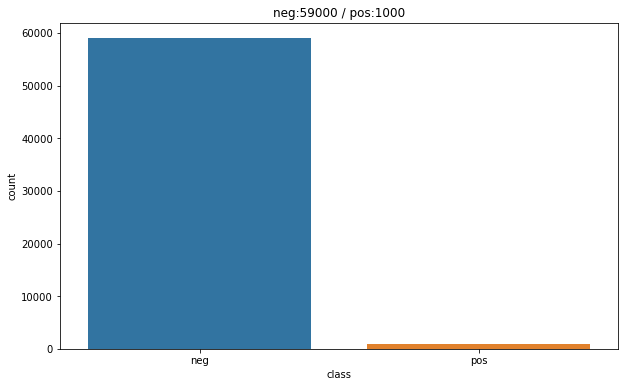

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(df["class"])
plt.title("neg:{0} / pos:{1}".format(df["class"].value_counts()[0], df["class"].value_counts()[1]))

### Report:
* This clearly shows that the target labels in train dataset are imbalanced i.e., negative samples are more than the positve samples. This dataset needs to be balanced to get accurate prediction results.

### Check Multicollinearity in Numerical features

In [23]:
df.corr()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,-0.032055,-0.001903,0.061971,0.089474,0.018610,0.143153,0.285815,0.495529,0.607674,...,0.735324,0.739211,0.717810,0.727240,0.726984,0.606232,0.471707,0.248039,0.019865,0.037099
ac_000,-0.032055,1.000000,-0.002380,-0.004997,-0.010554,0.017620,-0.001088,-0.016665,-0.038680,-0.049296,...,-0.013692,-0.008111,-0.009849,-0.011206,-0.021430,-0.029417,0.016908,0.024354,-0.006571,0.014228
ad_000,-0.001903,-0.002380,1.000000,-0.000214,-0.000269,-0.000047,-0.000131,-0.000222,-0.000423,-0.000687,...,-0.002090,-0.002047,-0.001940,-0.001667,-0.001398,-0.000829,-0.002161,-0.001050,-0.000102,-0.000120
ae_000,0.061971,-0.004997,-0.000214,1.000000,0.823108,-0.000430,-0.000832,0.005057,0.034163,0.064715,...,0.017338,0.024905,0.017311,0.039967,0.085884,0.052357,-0.010850,-0.008206,0.070886,0.041715
af_000,0.089474,-0.010554,-0.000269,0.823108,1.000000,-0.000534,-0.001017,0.010518,0.052386,0.097740,...,0.032896,0.047326,0.030789,0.067002,0.132319,0.070306,-0.013976,-0.010237,0.106281,0.060710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.606232,-0.029417,-0.000829,0.052357,0.070306,0.000307,0.044186,0.182990,0.505565,0.737313,...,0.454833,0.446803,0.437682,0.379892,0.545929,1.000000,0.224938,0.061478,-0.000715,0.002708
ee_008,0.471707,0.016908,-0.002161,-0.010850,-0.013976,-0.000823,0.004878,0.009466,0.021151,0.056399,...,0.453811,0.481392,0.459517,0.406920,0.373871,0.224938,1.000000,0.710056,-0.006991,-0.002833
ee_009,0.248039,0.024354,-0.001050,-0.008206,-0.010237,-0.001230,-0.004309,-0.009498,-0.019311,-0.017569,...,0.228248,0.239302,0.224638,0.190667,0.163792,0.061478,0.710056,1.000000,-0.003942,-0.000907
ef_000,0.019865,-0.006571,-0.000102,0.070886,0.106281,-0.000072,0.002875,0.011824,0.020560,0.021319,...,0.007118,0.017480,0.005835,0.050270,0.008461,-0.000715,-0.006991,-0.003942,1.000000,0.282184


#### Heatmap of correlation Matrix

<AxesSubplot:>

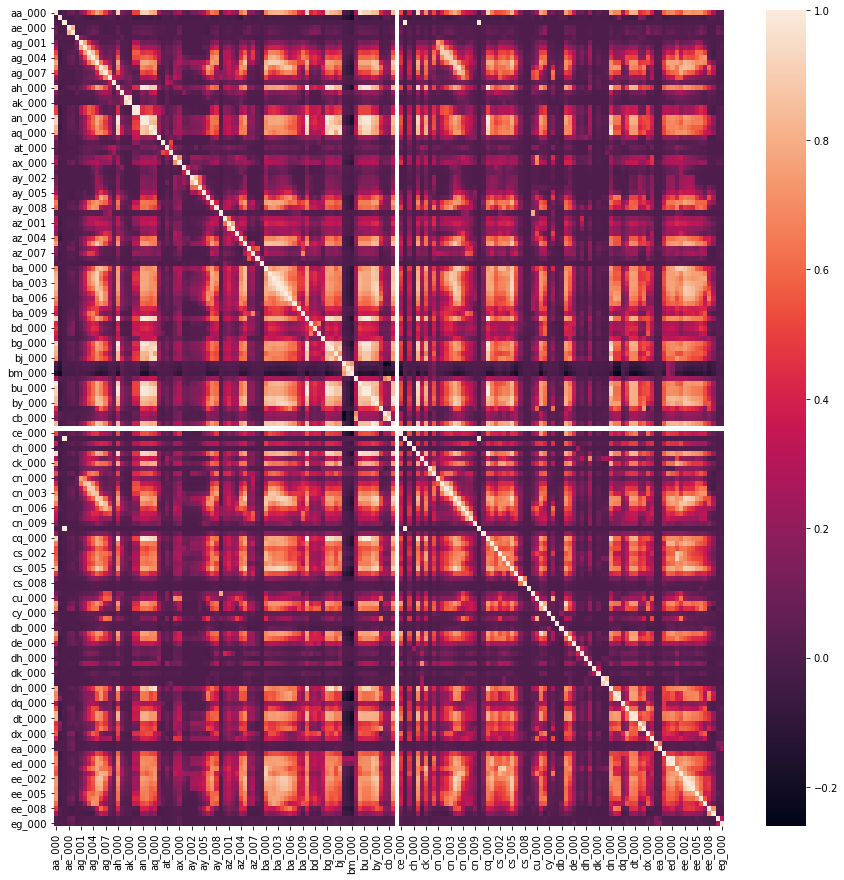

In [65]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

### Univariate Analysis of Numerical Features

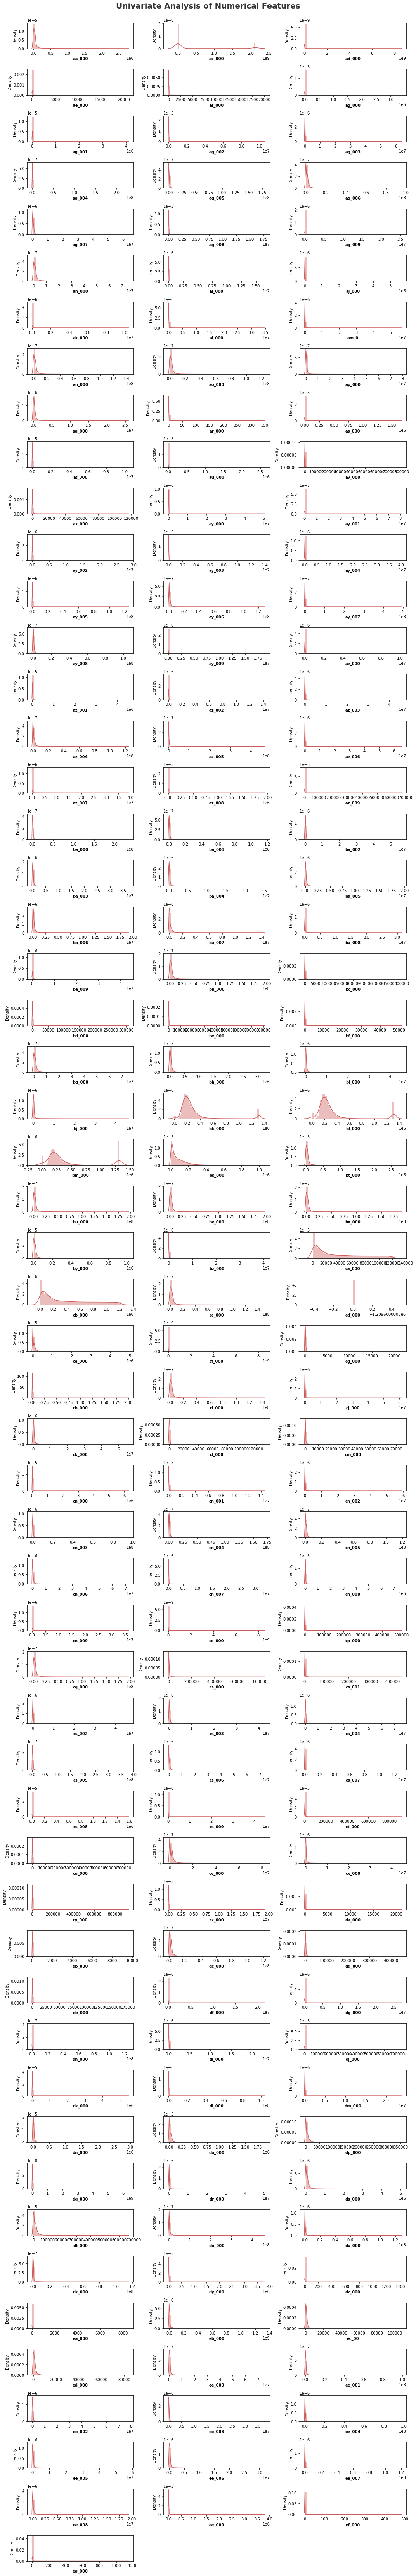

In [24]:
numeric_features=[features for features in df.columns if df[features].dtype!='O']

plt.figure(figsize=(15, 100))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()


#### Observation:
* Most of the features are not normally distributed.
* Transformation of data is not required as it is a classification problem.
* Interpreting each and every column is not necessary as this is sensor data.


# <font color="#BF3325">Model Evaluation on Multiple Classification Algorithms<font>

In [26]:
# Splitting X (input features) and y (target feature)
X=df.drop('class',axis=1)
y=df['class']

####  Splitting training and test data

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [38]:
x_train

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
12245,29148,2.130706e+09,642.0,0.0,0.0,0.0,0.0,0.0,0.0,380.0,...,273168.0,159516.0,579186.0,366864.0,11608.0,2704.0,474.0,0.0,0.0,0.0
9180,187748,8.733000e+04,NaN,0.0,0.0,0.0,57752.0,671848.0,2782724.0,11780158.0,...,3621436.0,206268.0,14112.0,428.0,100.0,34.0,0.0,0.0,0.0,0.0
35172,2886,1.200000e+02,112.0,0.0,0.0,0.0,0.0,0.0,0.0,298.0,...,55826.0,40198.0,19932.0,9560.0,5294.0,3180.0,5106.0,16.0,0.0,0.0
10166,42224,5.140000e+02,454.0,0.0,0.0,0.0,0.0,0.0,0.0,26044.0,...,261256.0,175452.0,932370.0,670900.0,984.0,158.0,30.0,0.0,0.0,0.0
22335,62714,1.020000e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,456.0,...,397484.0,155808.0,294090.0,287648.0,248916.0,224718.0,720772.0,155252.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28017,318,1.000000e+01,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1024.0,...,918.0,336.0,488.0,490.0,1828.0,8538.0,42.0,0.0,0.0,0.0
50496,8578,3.980000e+02,354.0,0.0,0.0,0.0,0.0,0.0,448.0,45694.0,...,61426.0,44178.0,146822.0,148708.0,11026.0,2616.0,456.0,0.0,0.0,0.0
29199,42376,2.130706e+09,194.0,0.0,0.0,0.0,0.0,0.0,0.0,8454.0,...,353900.0,176148.0,346594.0,425254.0,364800.0,153588.0,109876.0,3638.0,0.0,0.0
40061,56378,9.720000e+02,876.0,0.0,0.0,0.0,0.0,0.0,0.0,3082.0,...,602778.0,296374.0,603968.0,406488.0,256354.0,121858.0,117950.0,1580.0,0.0,0.0


In [39]:
x_train=x_train.replace(np.NaN,0)
x_test=x_test.replace(np.NaN,0)

In [29]:
y_train

12245    neg
9180     pos
35172    neg
10166    neg
22335    neg
        ... 
28017    neg
50496    neg
29199    neg
40061    neg
17673    neg
Name: class, Length: 40200, dtype: object

### <font color="#B4161B">1. Model Training by using Logistic Regression Model<font>

In [126]:
logistic_model=LogisticRegression()
logistic_model.fit(x_train, y_train)
y_pred_log=logistic_model.predict(x_test)
accuracy_score_log=accuracy_score(y_test, y_pred_log)
print(f"Accuracy Score of logistic regression model = {accuracy_score_log*100} %")

Accuracy Score of logistic regression model = 98.73232323232322 %


In [127]:
## Confusion Matrix
conf_mat_log=confusion_matrix(y_test,y_pred_log)
print(conf_mat_log)
tp,fp,fn,tn=conf_mat_log.ravel()


[[19354   111]
 [  140   195]]


In [128]:
conf_mat_accuracy=(tp+tn)/(tp+fp+fn+tn)

Precision=tp/(tp+fp)
Recall=tp/(tp+fn)
f1_score=2*(Precision*Recall)/(Precision+Recall)
Error_rate=(fp+fn)/(tp+fp+fn+tn)
print(f"Accuracy using confusion matrix = {round(conf_mat_accuracy*100,2)} %")
print(f"f1 score = {f1_score}")
print(f"Precision = {Precision}")
print(f"Recall = {Recall}")
print(f"Misclassification Rate = {Error_rate}")


Accuracy using confusion matrix = 98.73 %
f1 score = 0.9935573295002438
Precision = 0.994297456974056
Recall = 0.9928183030676105
Misclassification Rate = 0.012676767676767677


#### Calculating total cost for repairing after implementing logistic regression model

In [129]:
Total_cost_log = 10*fp + 500 *fn
print(f"Total cost of repair of logistic regression model = Rs. {Total_cost_log} /-")

Total cost of repair of logistic regression model = Rs. 71110 /-


### <font color="#B4161B">2. Model Training by using Decision Tree Classifier Model<font>

In [130]:
dec_tree_model=DecisionTreeClassifier()
dec_tree_model.fit(x_train, y_train)
y_pred_dec_tree=dec_tree_model.predict(x_test)
accuracy_score_dec_tree=accuracy_score(y_test, y_pred_dec_tree)
print(f"Accuracy Score of Decision Tree model = {accuracy_score_dec_tree*100} %")

Accuracy Score of Decision Tree model = 98.89393939393939 %


In [131]:
## Confusion Matrix
conf_mat_dec_tree=confusion_matrix(y_test,y_pred_dec_tree)
print(conf_mat_dec_tree)
tp,fp,fn,tn=conf_mat_dec_tree.ravel()

[[19347   118]
 [  101   234]]


In [132]:
conf_mat_accuracy=(tp+tn)/(tp+fp+fn+tn)

Precision=tp/(tp+fp)
Recall=tp/(tp+fn)
f1_score=2*(Precision*Recall)/(Precision+Recall)
Error_rate=(fp+fn)/(tp+fp+fn+tn)
print(f"Accuracy using confusion matrix = {round(conf_mat_accuracy*100,2)} %")
print(f"f1 score = {f1_score}")
print(f"Precision = {Precision}")
print(f"Recall = {Recall}")
print(f"Misclassification Rate = {Error_rate}")

Accuracy using confusion matrix = 98.89 %
f1 score = 0.9943720607509059
Precision = 0.9939378371435911
Recall = 0.9948066639243109
Misclassification Rate = 0.01106060606060606


#### Calculating total cost for repairing after implementing Decision Tree model

In [133]:
Total_cost_dec_tree = 10*fp + 500 *fn
print(f"Total cost of repair of Decision Tree model = Rs. {Total_cost_dec_tree} /-")

Total cost of repair of Decision Tree model = Rs. 51680 /-


### <font color="#B4161B">3. Model Training by using Random Forest Classifier Model<font>

In [166]:
Rf_model=RandomForestClassifier()
Rf_model.fit(x_train,y_train)
y_pred_rf=Rf_model.predict(x_test)
accuracy_score_rf=accuracy_score(y_test, y_pred_rf)
print(f"Accuracy Score of Random Forest model = {accuracy_score_rf*100} %")

Accuracy Score of Random Forest model = 99.35858585858585 %


In [167]:
## Confusion Matrix
conf_mat_rf=confusion_matrix(y_test,y_pred_rf)
print(conf_mat_rf)
tp,fp,fn,tn=conf_mat_rf.ravel()

[[19439    26]
 [  101   234]]


In [168]:
conf_mat_accuracy=(tp+tn)/(tp+fp+fn+tn)

Precision=tp/(tp+fp)
Recall=tp/(tp+fn)
f1_score=2*(Precision*Recall)/(Precision+Recall)
Error_rate=(fp+fn)/(tp+fp+fn+tn)
print(f"Accuracy using confusion matrix = {round(conf_mat_accuracy*100,2)} %")
print(f"f1 score = {f1_score}")
print(f"Precision = {Precision}")
print(f"Recall = {Recall}")
print(f"Misclassification Rate = {Error_rate}")

Accuracy using confusion matrix = 99.36 %
f1 score = 0.9967440071785668
Precision = 0.9986642692011303
Recall = 0.9948311156601842
Misclassification Rate = 0.006414141414141414


#### Calculating total cost for repairing after implementing Random Forest model

In [169]:
Total_cost_rf = 10*fp + 500 *fn
print(f"Total cost of repair of Random Forest = Rs. {Total_cost_rf} /-")

Total cost of repair of Random Forest = Rs. 50760 /-


### <font color="#B4161B">4. Model Training by using AdaBoost<font>

In [138]:
model_ada=AdaBoostClassifier()
model_ada.fit(x_train,y_train)
y_pred_ada=model_ada.predict(x_test)
accuracy_score_ada=accuracy_score(y_test,y_pred_ada)
print(f"Accuracy Score of AdaBoost model = {accuracy_score_ada*100} %")

Accuracy Score of AdaBoost model = 98.96969696969697 %


In [139]:
## Confusion Matrix
conf_mat_ada=confusion_matrix(y_test,y_pred_ada)
print(conf_mat_ada)
tp,fp,fn,tn=conf_mat_ada.ravel()

[[19382    83]
 [  121   214]]


In [140]:
conf_mat_accuracy=(tp+tn)/(tp+fp+fn+tn)

Precision=tp/(tp+fp)
Recall=tp/(tp+fn)
f1_score=2*(Precision*Recall)/(Precision+Recall)
Error_rate=(fp+fn)/(tp+fp+fn+tn)
print(f"Accuracy using confusion matrix = {round(conf_mat_accuracy*100,2)} %")
print(f"f1 score = {f1_score}")
print(f"Precision = {Precision}")
print(f"Recall = {Recall}")
print(f"Misclassification Rate = {Error_rate}")

Accuracy using confusion matrix = 98.97 %
f1 score = 0.9947649353315541
Precision = 0.9957359362959157
Recall = 0.9937958262831359
Misclassification Rate = 0.010303030303030303


#### Calculating total cost for repairing after implementing AdaBoost model

In [141]:
Total_cost_ada = 10*fp + 500 *fn
print(f"Total cost of repair of AdaBoost Classifier model = Rs. {Total_cost_ada} /-")

Total cost of repair of AdaBoost Classifier model = Rs. 61330 /-


### <font color="#B4161B">5. Model Training by using SVM(SVC)<font>

In [146]:
model_svc=SVC()
model_svc.fit(x_train,y_train)
y_pred_svc=model_svc.predict(x_test)
accuracy_score_svc=accuracy_score(y_test,y_pred_svc)
print(f"Accuracy Score of SVM model = {accuracy_score_svc*100} %")

Accuracy Score of SVM model = 98.32323232323232 %


In [147]:
## Confusion Matrix
conf_mat_svc=confusion_matrix(y_test,y_pred_svc)
print(conf_mat_svc)
tp,fp,fn,tn=conf_mat_svc.ravel()

[[19465     0]
 [  332     3]]


In [148]:
conf_mat_accuracy=(tp+tn)/(tp+fp+fn+tn)

Precision=tp/(tp+fp)
Recall=tp/(tp+fn)
f1_score=2*(Precision*Recall)/(Precision+Recall)
Error_rate=(fp+fn)/(tp+fp+fn+tn)
print(f"Accuracy using confusion matrix = {round(conf_mat_accuracy*100,2)} %")
print(f"f1 score = {f1_score}")
print(f"Precision = {Precision}")
print(f"Recall = {Recall}")
print(f"Misclassification Rate = {Error_rate}")

Accuracy using confusion matrix = 98.32 %
f1 score = 0.9915439865518823
Precision = 1.0
Recall = 0.983229782290246
Misclassification Rate = 0.016767676767676768


#### Calculating total cost for repairing after implementing svm model

In [149]:
Total_cost_svc = 10*fp + 500 *fn
print(f"Total cost of repair svm model = Rs. {Total_cost_svc} /-")

Total cost of repair svm model = Rs. 166000 /-


### <font color="#B4161B">6. Model Training by Bagging Classifier<font>

In [150]:
model_bagg=BaggingClassifier()
model_bagg.fit(x_train,y_train)
y_pred_bagg=model_bagg.predict(x_test)
accuracy_score_bagg=accuracy_score(y_test,y_pred_bagg)
print(f"Accuracy Score of Bagging  Classifier= {accuracy_score_bagg*100} %")

Accuracy Score of Bagging  Classifier= 99.3030303030303 %


In [151]:
## Confusion Matrix
conf_mat_bagg=confusion_matrix(y_test,y_pred_bagg)
print(conf_mat_bagg)
tp,fp,fn,tn=conf_mat_bagg.ravel()

[[19434    31]
 [  107   228]]


In [152]:
conf_mat_accuracy=(tp+tn)/(tp+fp+fn+tn)

Precision=tp/(tp+fp)
Recall=tp/(tp+fn)
f1_score=2*(Precision*Recall)/(Precision+Recall)
Error_rate=(fp+fn)/(tp+fp+fn+tn)
print(f"Accuracy using confusion matrix = {round(conf_mat_accuracy*100,2)} %")
print(f"f1 score = {f1_score}")
print(f"Precision = {Precision}")
print(f"Recall = {Recall}")
print(f"Misclassification Rate = {Error_rate}")

Accuracy using confusion matrix = 99.3 %
f1 score = 0.996462082756499
Precision = 0.9984073978936553
Recall = 0.9945243334527404
Misclassification Rate = 0.0069696969696969695


#### Calculating total cost for repairing after implementing Bagging Classifier Model

In [153]:
Total_cost_bagg = 10*fp + 500 *fn
print(f"Total cost of repair of bagging classifier model = Rs. {Total_cost_bagg} /-")

Total cost of repair of bagging classifier model = Rs. 53810 /-


### <font color="#B4161B">7. Model Training by Gradient Boost<font>

In [154]:
model_gr=GradientBoostingClassifier()
model_gr.fit(x_train,y_train)
y_pred_gr=model_gr.predict(x_test)
accuracy_score_gr=accuracy_score(y_test,y_pred_gr)
print(f"Accuracy Score of Gradient Boosting  Classifier= {accuracy_score_gr*100} %")

Accuracy Score of Gradient Boosting  Classifier= 99.27777777777777 %


In [157]:
## Confusion Matrix
conf_mat_gr=confusion_matrix(y_test,y_pred_gr)
print(conf_mat_gr)
tp,fp,fn,tn=conf_mat_gr.ravel()

[[19424    41]
 [  102   233]]


In [158]:
conf_mat_accuracy=(tp+tn)/(tp+fp+fn+tn)

Precision=tp/(tp+fp)
Recall=tp/(tp+fn)
f1_score=2*(Precision*Recall)/(Precision+Recall)
Error_rate=(fp+fn)/(tp+fp+fn+tn)
print(f"Accuracy using confusion matrix = {round(conf_mat_accuracy*100,2)} %")
print(f"f1 score = {f1_score}")
print(f"Precision = {Precision}")
print(f"Recall = {Recall}")
print(f"Misclassification Rate = {Error_rate}")

Accuracy using confusion matrix = 99.28 %
f1 score = 0.9963324869841759
Precision = 0.9978936552787053
Recall = 0.9947761958414422
Misclassification Rate = 0.007222222222222222


#### Calculating total cost for repairing after implementing Gradient Boosting Classifier Model

In [159]:
Total_cost_gr = 10*fp + 500 *fn
print(f"Total cost of repair of gradiend boost = Rs. {Total_cost_gr} /-")

Total cost of repair of gradiend boost = Rs. 51410 /-


In [160]:
y_train= y_train.replace({'pos': 1, 'neg': 0})
y_test=y_test.replace({'pos': 1, 'neg': 0})

### <font color="#B4161B">8. Model Training by XG Boost Classifier<font>

In [161]:
model_xgb=xgboost.XGBClassifier()
model_xgb.fit(x_train,y_train)
y_pred_xgb=model_xgb.predict(x_test)
accuracy_score_xgb=accuracy_score(y_test,y_pred_xgb)
print(f"Accuracy Score of XG Boost Classifier= {accuracy_score_xgb*100} %")

Accuracy Score of XG Boost Classifier= 99.46464646464646 %


In [162]:
## Confusion Matrix
conf_mat_xgb=confusion_matrix(y_test,y_pred_xgb)
print(conf_mat_xgb)
tp,fp,fn,tn=conf_mat_xgb.ravel()

[[19435    30]
 [   76   259]]


#### Calculating total cost for repairing after implementing XG Boost Classifier Model

In [163]:
Total_cost_xgb = 10*fp + 500 *fn
print(f"Total cost of repair of XG_boost = Rs. {Total_cost_xgb} /-")

Total cost of repair of XG_boost = Rs. 38300 /-


### Final Results of all Classifier model

In [172]:
print(f"1. Accuracy Score of logistic regression model = {accuracy_score_log*100} %")
print(f"2. Accuracy Score of Decision Tree Classifier model = {accuracy_score_dec_tree*100} %")
print(f"3. Accuracy Score of Random Forest Classifier model = {accuracy_score_rf*100} %")
print(f"4. Accuracy Score of AdaBoost Classifier model = {accuracy_score_ada*100} %")
print(f"5. Accuracy Score of SVM model = {accuracy_score_svc*100} %")
print(f"6. Accuracy Score of Bagging Classifier model = {accuracy_score_bagg*100} %")
print(f"7. Accuracy Score of Gradient Boosting model = {accuracy_score_gr*100} %")
print(f"8. Accuracy Score of XG Boost model = {accuracy_score_xgb*100} %")

print("\n------------------------------------------------------------------------- \n")

print(f"1. Total cost of repair after implementing logistic regression model = Rs. {Total_cost_log} /-")
print(f"2. Total cost of repair after implementing Decision Tree Classifier model = Rs. {Total_cost_dec_tree} /-")
print(f"3. Total cost of repair after implementing Random Forest Classifier model = Rs. {Total_cost_rf} /-")
print(f"4. Total cost of repair after implementing AdaBoost Classifier model = Rs. {Total_cost_ada} /-")
print(f"5. Total cost of repair after implementing SVM model = Rs. {Total_cost_svc} /-")
print(f"6. Total cost of repair after implementing Bagging Classifier model = Rs. {Total_cost_bagg} /-")
print(f"7. Total cost of repair after implementing Gradient Boosting model  = Rs. {Total_cost_gr} /-")
print(f"8. Total cost of repair after implementing XG Boost model  = Rs. {Total_cost_xgb} /-")

print("\n------------------------------------------------------------------------- \n")

1. Accuracy Score of logistic regression model = 98.73232323232322 %
2. Accuracy Score of Decision Tree Classifier model = 98.89393939393939 %
3. Accuracy Score of Random Forest Classifier model = 99.35858585858585 %
4. Accuracy Score of AdaBoost Classifier model = 98.96969696969697 %
5. Accuracy Score of SVM model = 98.32323232323232 %
6. Accuracy Score of Bagging Classifier model = 99.3030303030303 %
7. Accuracy Score of Gradient Boosting model = 99.27777777777777 %
8. Accuracy Score of XG Boost model = 99.46464646464646 %

------------------------------------------------------------------------- 

1. Total cost of repair after implementing logistic regression model = Rs. 71110 /-
2. Total cost of repair after implementing Decision Tree Classifier model = Rs. 51680 /-
3. Total cost of repair after implementing Random Forest Classifier model = Rs. 50760 /-
4. Total cost of repair after implementing AdaBoost Classifier model = Rs. 61330 /-
5. Total cost of repair after implementing SVM

### <font color="#E21717">Final Report:<font>

* After implementation of all classifier model and after analysing the accuracy score of all model and cost of repair, it is observed that XGBoost Classifier model will be the best model for our problem because 
* <b>the accuracy score is highest in XG Boost model i.e. 99.46% out of all models<b> 
* <b>cost of repairing is also least in XG Boost model i.e Rs. 38300 /-<b>